In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
df = pd.read_csv('advertising.csv')
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.shape

(200, 4)

In [ ]:
df.isna().any()

,0
TV,False
Radio,False
Newspaper,False
Sales,False


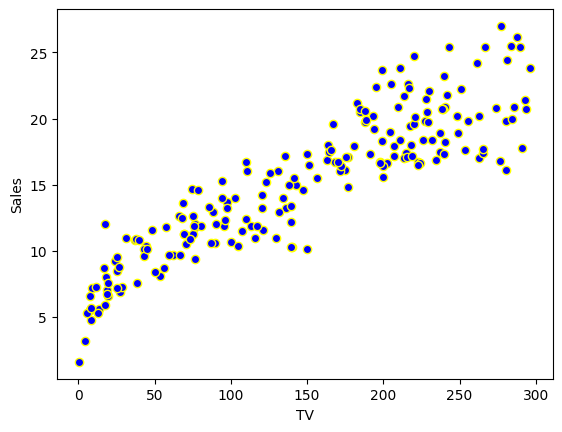

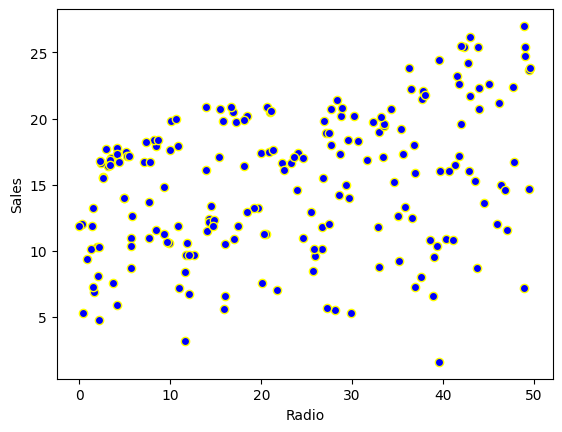

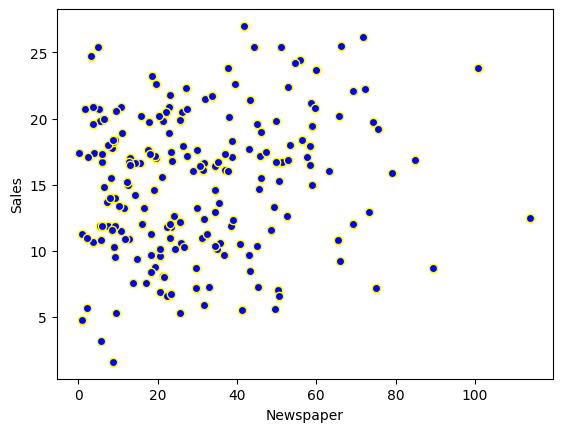

In [ ]:
plt.scatter(df['TV'], df['Sales'], color='blue', edgecolors='yellow', marker='o', alpha=1)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

plt.scatter(df['Radio'], df['Sales'], color='blue', edgecolors='yellow', marker='o', alpha=1)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

plt.scatter(df['Newspaper'], df['Sales'], color='blue', edgecolors='yellow', marker='o', alpha=1)
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()


In [ ]:
feature_cols = ['TV']  # since we are doing simple linear regression, I have taken only one feature
X = df[feature_cols]
y = df.Sales


In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
print(f"Shape of X_train is {X_train.shape}")
print(f"Shape of y_train is {y_train.shape}")
print(f"Shape of X_test is {X_test.shape}")
print(f"Shape of y_test is {y_test.shape}")


Shape of X_train is (140, 1)
Shape of y_train is (140,)
Shape of X_test is (60, 1)
Shape of y_test is (60,)


In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [ ]:
print(f"The intercept is {lm.intercept_}")  # Gives the intercept
print(f"The coefficient is {lm.coef_}")     # Gives the coefficient


The intercept is 7.206554548173251
The coefficient is [0.05483488]


In [ ]:
preds_train = lm.predict(X_train)
preds_test = lm.predict(X_test)


In [ ]:
preds_train, y_train


(array([22.79611201, 17.34552456, 13.39741293,  8.51162478, 23.14705527,
         8.27035129, 23.30607643,  8.23196688, 14.57087944,  8.61032757,
        12.71197688, 11.60431223, 17.53744666, 16.91232898, 14.09929944,
        18.69994619, 15.04245944, 17.34552456, 19.4018327 , 20.46014596,
         8.14971455, 13.81415805, 12.12524362, 17.68550084, 11.34658827,
        17.8006541 , 11.90590409, 21.84198503,  9.37253246, 21.53490968,
         7.93037501, 17.82807154, 23.45961411, 21.77069968, 18.9796041 ,
        15.41533665, 14.42830874, 10.35956037, 20.37241015, 14.95472363,
        17.12070154, 12.53650525, 19.29764643, 14.89988874, 21.21138387,
        12.48167037, 10.83114037, 20.32854224, 16.84104363, 20.37241015,
         8.18809897, 19.82406131, 22.75772759, 16.59977014, 18.12417991,
        13.95672874, 14.39540781,  8.58291013, 16.17205805, 20.84947364,
        18.31061852,  7.92489153,  7.43137757, 12.35555014, 21.6226455 ,
        19.72535852, 21.12364806, 20.54239829, 20.3

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print(f"RMSE for train data is : {np.sqrt(mean_squared_error(y_train, preds_train))}")
print(f"R2 for train data is {r2_score(y_train, preds_train)}")
print(f"RMSE for test data is : {np.sqrt(mean_squared_error(y_test, preds_test))}")
print(f"R2 for test data is {r2_score(y_test, preds_test)}")


RMSE for train data is : 2.2947606612962392
R2 for train data is 0.799626928219267
RMSE for test data is : 2.2758570698017597
R2 for test data is 0.814855389208679


Text(0, 0.5, 'Sales')

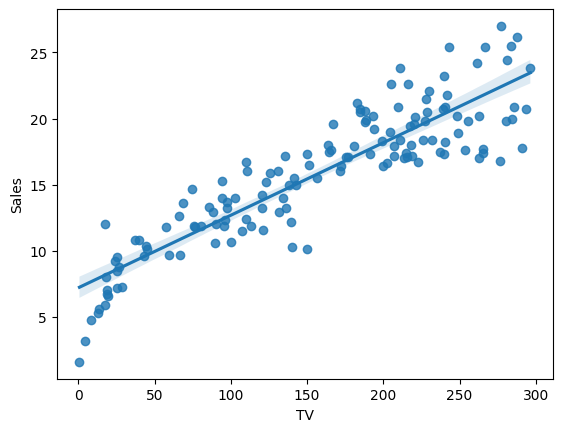

In [ ]:
sns.regplot(x=np.reshape(X_train, newshape=(140,)), y=np.reshape(y_train, newshape=(140,)))
plt.xlabel("TV")
plt.ylabel("Sales")
